### Shruti Mishra #3742137

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, auc
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading and checking the dataset

In [80]:
df_train = pd.read_csv("/content/drive/MyDrive/Teaching/TME_6015/week_6/unsw-nb15/UNSW_NB15_training-set.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Teaching/TME_6015/week_6/unsw-nb15/UNSW_NB15_testing-set.csv")
print("Length of training set: ", len(df_train))
print("Length of testing set: ", len(df_test))

Length of training set:  82332
Length of testing set:  175341


In order to ensure the balance between the training and testing sets and avoid processing twice, we decided to concatenate them into one dataframe and redivide them with a different ratio later with sklearn.model_selection.train_test_split().

In [81]:
df = pd.concat([df_train, df_test])
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257673 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

In [52]:
df.describe(include="all")

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,257673.000000,257673.000000,257673,257673,257673,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,...,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673,257673.000000
unique,NaN,NaN,133,13,11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,tcp,-,FIN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,123041,141321,117164,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93000,NaN
mean,72811.823858,1.246715,NaN,NaN,NaN,19.777144,18.514703,8.572952e+03,1.438729e+04,9.125391e+04,...,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274,NaN,0.639077
std,48929.917641,5.974305,NaN,NaN,NaN,135.947152,111.985965,1.737739e+05,1.461993e+05,1.603446e+05,...,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618,NaN,0.480269
min,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,32210.000000,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,3.078928e+01,...,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,NaN,0.000000
50%,64419.000000,0.004285,NaN,NaN,NaN,4.000000,2.000000,5.280000e+02,1.780000e+02,2.955665e+03,...,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,NaN,1.000000
75%,110923.000000,0.685777,NaN,NaN,NaN,12.000000,10.000000,1.362000e+03,1.064000e+03,1.250000e+05,...,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,NaN,1.000000


## Data Preparation

### Checking for duplicates

In [53]:
print(df.duplicated().sum())

0


There is no duplicate record.

### Checking for missing values

In [54]:
print(df.isna().sum())

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

There is no missing value.

Dropping the column id. This is just for identification, so we can remove this column.

In [55]:
df = df.drop(columns=['id'])

In [56]:
df.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [57]:
df.attack_cat.unique()

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

## Categorical data

In [58]:
for col in ['proto', 'service', 'state']:
    df[col] = df[col].astype('category').cat.codes

df['attack_cat'] = df['attack_cat'].astype('category')
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,119,0,5,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,119,0,5,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,119,0,5,2,0,1068,0,200000.0051,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,119,0,5,2,0,900,0,166666.6608,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,119,0,5,2,0,2126,0,100000.0025,254,...,1,3,0,0,0,2,3,0,Normal,0


## Visualizing attacks categories

Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Normal                0
Name: attack_cat, dtype: int64


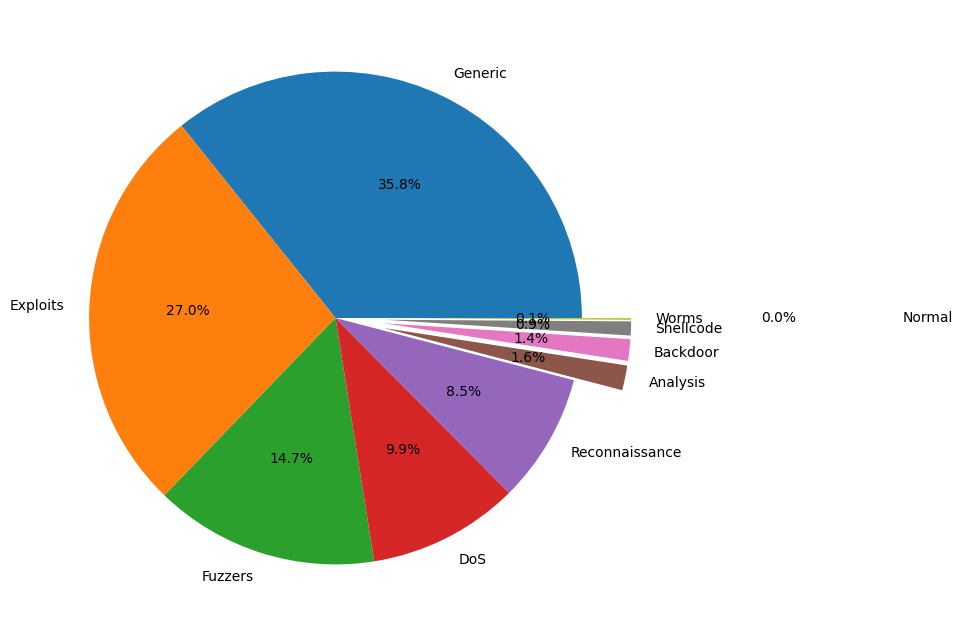

In [59]:
validAttacks = df[df['label']==1]['attack_cat'].value_counts()
print(validAttacks)

plt.figure(figsize = (15,8))
plt.pie(validAttacks,labels = validAttacks.index, autopct = '%1.1f%%',explode = [0,0,0,0,0,0.2,0.2,0.2,0.2,1.2])
plt.show()

Generic and Exploits attacks are the most.

## Dropping unnecessary features

This is a binary classification problem, so we only use column label to classify attack (1) or normal (0). Then, we do not need attack details in attack_cat.

In [60]:
df = df.drop(columns=['attack_cat'])

# Splitting training and testing sets

In [61]:
X = df.drop(columns=['label'])
feature_list = list(X.columns)
#X = np.array(X)
y = df['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [62]:
print("Training set:", len(X_train))
print("Testing set:", len(X_test))
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

Training set: 180371
Testing set: 77302
X_train shape:  (180371, 42)
y_train shape:  (180371,)
X_test shape:  (77302, 42)
y_test shape:  (77302,)


# Scaling
Scaling all features using StandardScaler.

In [63]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model training

In [64]:
models = {}
models['Decision Tree Classifier'] = DecisionTreeClassifier()
models['Random Forest Classifier'] = RandomForestClassifier()
models['Gaussian Naive Bayes'] = GaussianNB()

In [65]:
train_score, accuracy, precision, recall, training_time, y_pred = {}, {}, {}, {}, {}, {}
for key in models.keys():
    start_time = time.time()
    models[key].fit(X_train, y_train)
    training_time[key] = time.time() - start_time

    y_pred[key] = models[key].predict(X_test)

    train_score[key] = models[key].score(X_train, y_train)
    accuracy[key] = models[key].score(X_test, y_test)
    precision[key] = precision_score(y_test, y_pred[key])
    recall[key] = recall_score(y_test, y_pred[key])

## Models comparison

In [66]:
df_models = pd.DataFrame(index=models.keys(), columns=['Training score', 'Accuracy', 'Precision', 'Recall', 'Training time'])
df_models['Training score'] = train_score.values()
df_models['Accuracy'] = accuracy.values()
df_models['Precision'] = precision.values()
df_models['Recall'] = recall.values()
df_models['Training time'] = training_time.values()

In [67]:
df_models

,Training score,Accuracy,Precision,Recall,Training time
Decision Tree Classifier,0.997699,0.936159,0.949830,0.950349,2.569535
Random Forest Classifier,0.997699,0.948643,0.961444,0.958098,30.592473
Gaussian Naive Bayes,0.818735,0.816227,0.860076,0.851027,0.082931


Random Forest Classifier is the best model so far. We will choose this model for the further Intrusion Detection.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


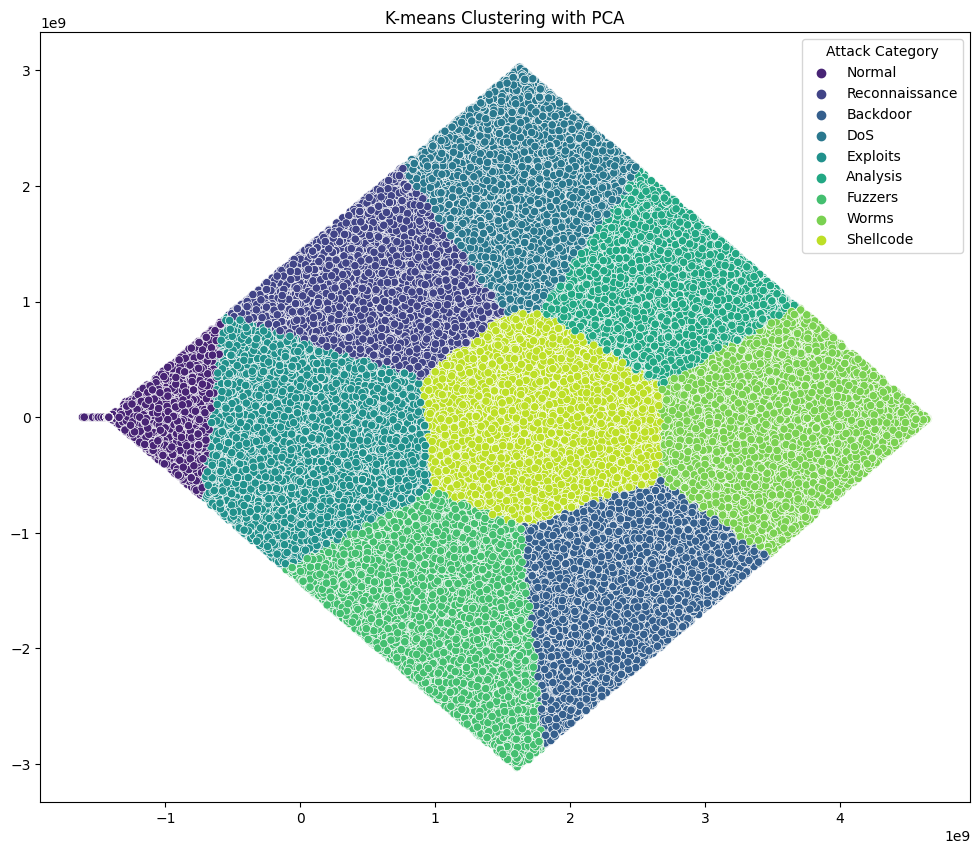

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the NumPy array to a Pandas DataFrame
X_df = pd.DataFrame(X, columns=feature_list)

# Drop non-numeric columns and handle any missing values
X_numeric = X_df.select_dtypes(include=[np.number])

# Apply PCA to reduce the feature space to two dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_numeric)

# Perform clustering using K-means on the PCA components
kmeans = KMeans(n_clusters=9, random_state=42)
X_df['cluster'] = kmeans.fit_predict(X_numeric)

cluster_palette = sns.color_palette("viridis", n_colors=len(X_df['cluster'].unique()))
cluster_colors = dict(zip(X_df['cluster'].unique(), cluster_palette))

# Map 'cluster' to colors for the 'hue' parameter
X_df['hue_colors'] = X_df['cluster'].map(cluster_colors)

# Visualize the clustering results using the first two PCA components
plt.figure(figsize=(12, 10))
scatter = sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=X_df['hue_colors'], palette=cluster_colors.values(), legend='full')

# Customize legend based on 'attack_cat'
handles, labels = scatter.get_legend_handles_labels()
labels = X_df['attack_cat'].unique()

scatter.legend(handles, labels, title='Attack Category', loc='upper right')

plt.title('K-means Clustering with PCA')
plt.show()


Observation : Clusters vary in size and shape, with some demonstrating more irregular structures. This suggests inherent complexities in the data structure that contribute to the formation of distinct groups.

### Correlations

To improve our understanding of the variables involved in cyber attack detection, we need to analyze the network data. Correlation diagrams can be helpful in visualizing how different variables are associated with each other and with cyber attacks. Additionally, random forest models can help identify the importance of different features in predicting the target variable. We can compare the feature rankings from the random forest with the results of the correlation analysis to gain a better understanding of the key features to focus on for effective cyber attack detection.

<ipython-input-68-f893e3f17683>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


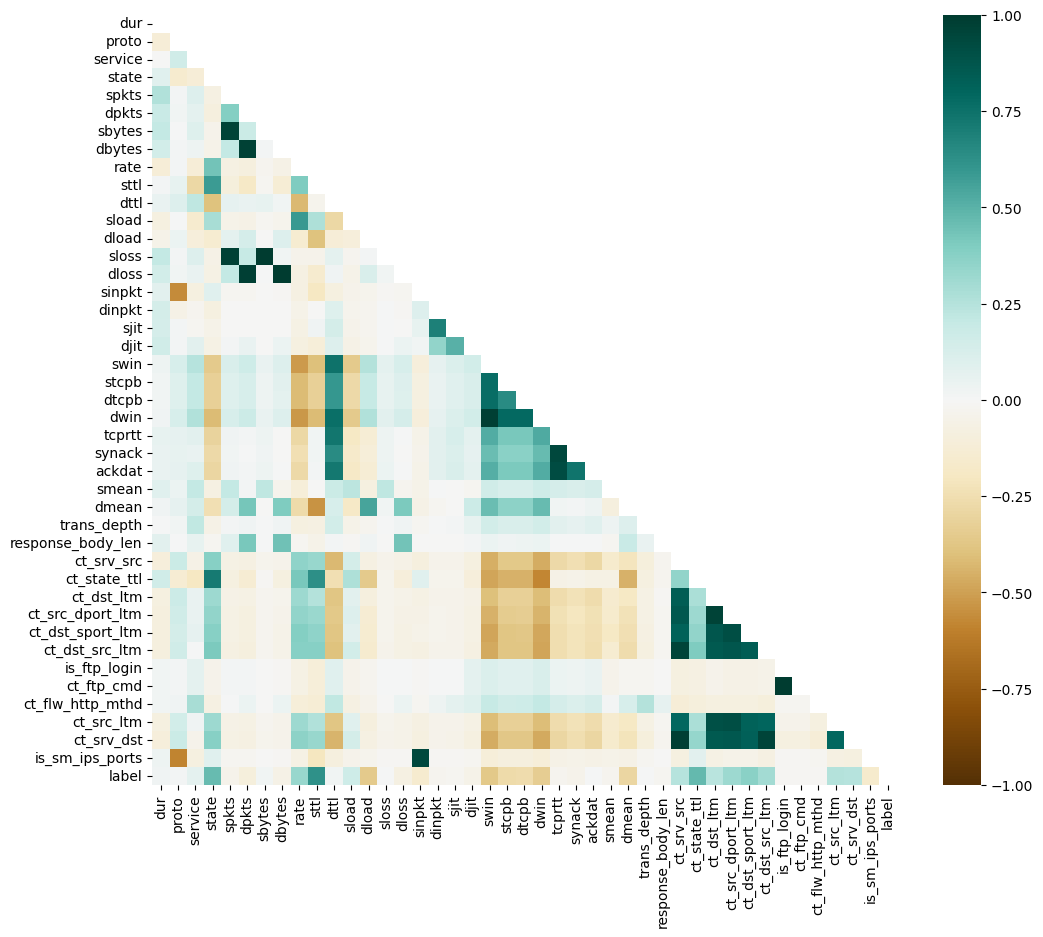

In [68]:
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(df.corr(),vmin=-1, vmax=1,cmap='BrBG', mask=mask)
plt.show()

### Correlation of variables with attack labels

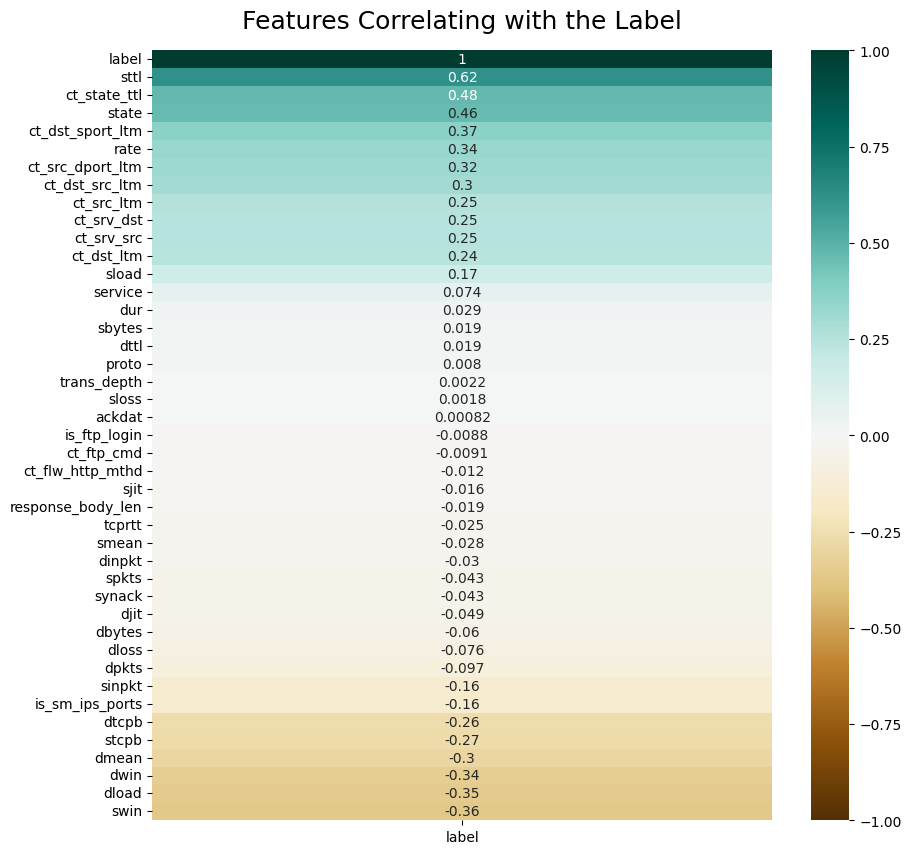

In [69]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(df.corr()[['label']].sort_values(by='label', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with the Label', fontdict={'fontsize':18}, pad=16)
plt.show()

The following variables are positively correlated with cyber attacks:

- sttl: Source to destination time to live value.
- ct_state_ttl and state: These features reflect various stages of TCP connections and may be related to port scanning, SYN flood, or DDoS attacks.
- ct_dst_sport_ltm: This feature measures the number of connections from the same source IP to the same destination port in a short time period.
- rate: This feature may represent various types of traffic rates or frequencies.

The following variables are negatively correlated with cyber attacks:

- swin
- dload

### Filtering data for potential attacks

In [70]:
X_test = pd.DataFrame(X_test, columns=feature_list)
X_test = X_test.reset_index(drop=True)

rules= "(sttl <= 61.00 & sinpkt<= 0.00) | (sttl >  61.00 )"

ind = X_test.query(rules).index

X_test_2 = X_test.loc[ind,:]
y_test_2 = y_test[ind]

print(X_test.shape)
print(X_test_2.shape)
print("filtered data" , (1- np.round(X_test_2.shape[0] / X_test.shape[0],2))*100, "%")

(77302, 42)
(74802, 42)
filtered data 3.0000000000000027 %


23% of network traffic was filtered for further analysis, demonstrating its efficacy in detecting non-threatening network activity. Now, we will detect cyber attacks by applying the trained model to the filtered test data.

In [71]:
def model_evaluation(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test_2)

    accuracy = accuracy_score(y_test_2, y_pred)
    recall = recall_score(y_test_2, y_pred)
    precision = precision_score(y_test_2, y_pred)
    print("Recall: ", recall)
    print("Precision: ", precision)
    print("Accuracy: ", accuracy)

    cross = pd.crosstab(pd.Series(y_test_2, name='Actual'), pd.Series(y_pred, name='Predicted'))
    plt.figure(figsize=(5, 5))
    sns.heatmap(cross, annot=True,fmt='d', cmap="YlGnBu")
    plt.show()

    return {'Recall' : recall}

In [72]:
results = {}

### Random Forest Model

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Recall:  0.9587898508938133
Precision:  0.9615027158759991
Accuracy:  0.9483302585492367


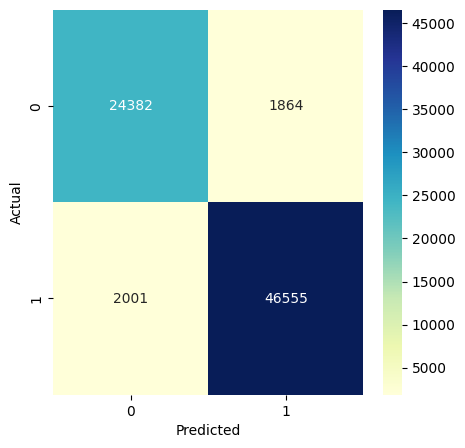

In [73]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=11)

results['Random Forest Model'] = model_evaluation(rf)

### Feature Ranking

In [74]:
feature_imp = pd.DataFrame({'Name':X.columns, 'Importance':rf.feature_importances_})

feature_imp = feature_imp.sort_values('Importance',ascending=False).reset_index(drop=True)

feature_imp[:10].style.background_gradient()

,Name,Importance
0,sttl,0.144773
1,ct_state_ttl,0.093865
2,rate,0.056895
3,dload,0.046490
4,sload,0.044910
5,sbytes,0.043058
6,ct_srv_dst,0.038810
7,smean,0.037594
8,dttl,0.036539
9,ct_dst_src_ltm,0.036140


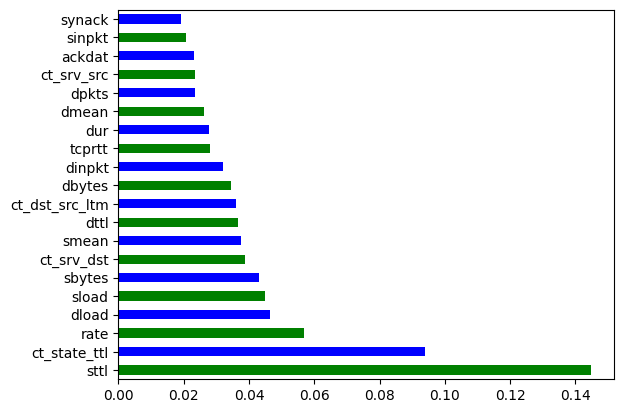

In [75]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh',color=['g','b']*5)
plt.show()

Selecting only the top 10 features to find their associations with the type of attack.

In [76]:
top10= feature_imp.Name[:10].tolist()
top10

['sttl',
 'ct_state_ttl',
 'rate',
 'dload',
 'sload',
 'sbytes',
 'ct_srv_dst',
 'smean',
 'dttl',
 'ct_dst_src_ltm']

In [78]:
X = df[top10]
y = df['label'].values

rf_top10 = RandomForestClassifier(random_state=11)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

rf_top10.fit(X_train, y_train)

y_pred = rf_top10.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.941760885876174


In [82]:
top10= feature_imp.Name[:10].tolist()

attack_names = np.array(df['attack_cat'].unique())

### Random Forest With Attack Category As the Prediction Labels

Accuracy:  0.8225531034125896


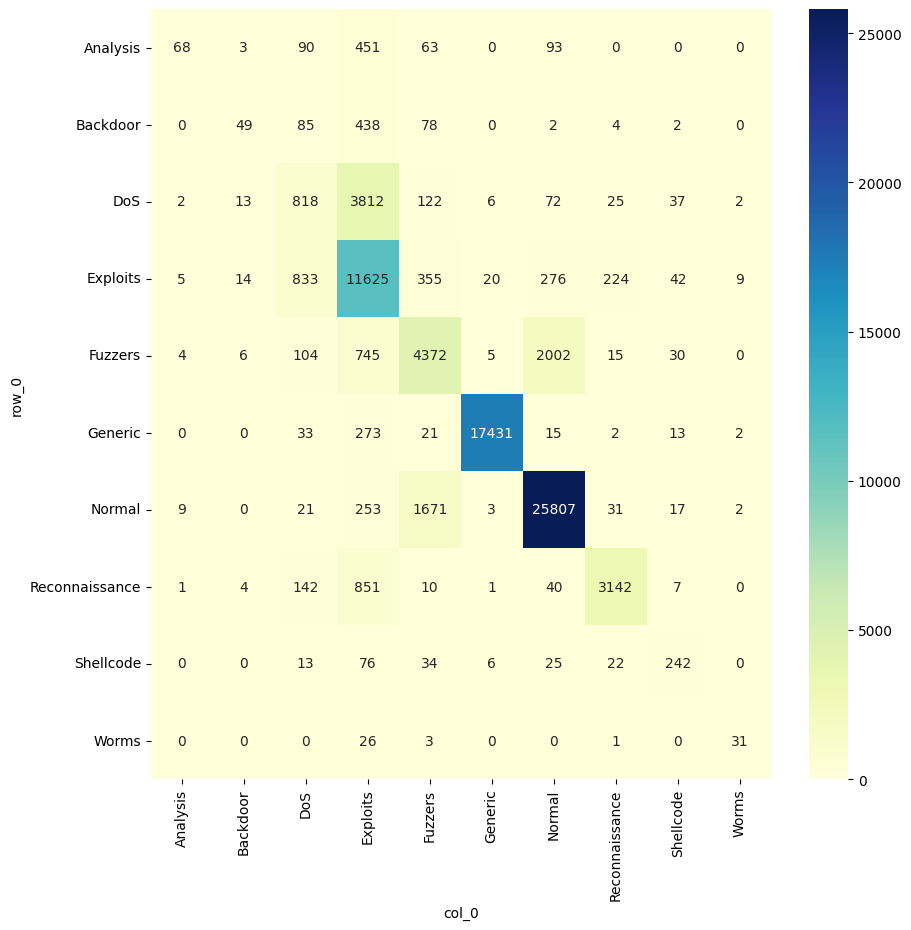

In [83]:
top10= feature_imp.Name[:10].tolist()

X = df.loc[:, df.columns.isin(top10)]

y = df['attack_cat'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

rf = RandomForestClassifier(random_state=11,min_samples_leaf= 1, min_samples_split= 5, n_estimators= 100)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

cross = pd.crosstab(y_test,  y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cross, annot=True,fmt='d', cmap="YlGnBu")
plt.show()

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                precision    recall  f1-score   support

      Analysis       0.76      0.09      0.16       768
      Backdoor       0.55      0.07      0.13       658
           DoS       0.38      0.17      0.23      4909
      Exploits       0.63      0.87      0.73     13403
       Fuzzers       0.65      0.60      0.62      7283
       Generic       1.00      0.98      0.99     17790
        Normal       0.91      0.93      0.92     27814
Reconnaissance       0.91      0.75      0.82      4198
     Shellcode       0.62      0.58      0.60       418
         Worms       0.67      0.51      0.58        61

      accuracy                           0.82     77302
     macro avg       0.71      0.55      0.58     77302
  weighted avg       0.82      0.82      0.81     77302



Observation: Generic, Normal, and Exploits attacks have high recalls.

Results: The results obtained from the implemented model and analysis reveal valuable insights into the effectiveness of the anomaly detection system.

- The Random Forest Classifier demonstrated high accuracy, precision, and recall, as indicated by the evaluation metrics.

- The feature importance analysis identified the top 10 features contributing significantly to the model's decision-making.
This analysis aids in understanding which features play a crucial role in the model's ability to distinguish between normal and attack instances.

- Visualizations such as the confusion matrix and heatmaps provide a graphical representation of the model's classification results to facilitate a better understanding of where the model excels and areas where adjustments or improvements may be necessary.

In conclusion, the comprehensive analysis and results obtained provide a solid foundation for understanding the strengths and areas for enhancement in the intrusion detection system. These insights are crucial for refining the model and ensuring its effectiveness in real-world scenarios.